In [1]:
import tensorflow as tf
import cv2
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import sklearn
import math
import pandas as pd

In [2]:
ds = tfds.as_numpy(tfds.load('deep_weeds', as_supervised = True, shuffle_files = True, batch_size = -1))

Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [3]:
images, label = ds['train']

In [4]:
images[0]

array([[[ 26,  31,  25],
        [ 31,  36,  30],
        [ 26,  33,  26],
        ...,
        [ 45,  54,  53],
        [108, 112, 113],
        [ 97, 101, 102]],

       [[ 22,  27,  21],
        [ 38,  43,  37],
        [ 12,  19,  12],
        ...,
        [ 66,  72,  72],
        [141, 145, 146],
        [112, 116, 117]],

       [[  7,  12,   6],
        [ 34,  39,  33],
        [  8,  15,   8],
        ...,
        [ 48,  52,  53],
        [ 47,  48,  50],
        [ 77,  78,  80]],

       ...,

       [[158, 133, 128],
        [149, 126, 120],
        [143, 124, 117],
        ...,
        [155, 157, 170],
        [134, 136, 148],
        [ 38,  40,  52]],

       [[107,  92,  85],
        [133, 120, 112],
        [150, 141, 132],
        ...,
        [170, 169, 183],
        [155, 155, 167],
        [ 27,  27,  37]],

       [[ 61,  51,  42],
        [ 76,  67,  58],
        [147, 143, 132],
        ...,
        [178, 177, 191],
        [163, 161, 174],
        [ 33,  31,  42]]

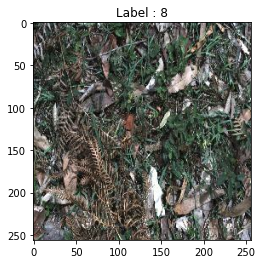

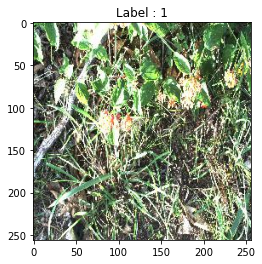

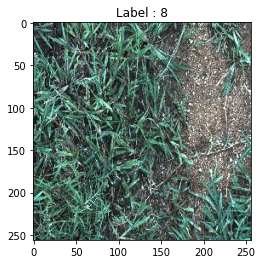

In [5]:
#Check some images
for i in range(3):
    fig , ax = plt.subplots()
    ax.imshow(images[i])
    ax.set_title("Label : " + str(label[i]))

In [14]:
img_0 = images[np.where(label == 0)]
img_1 = images[np.where(label == 1)]
img_2 = images[np.where(label == 2)]
img_3 = images[np.where(label == 3)]
img_4 = images[np.where(label == 4)]
img_5 = images[np.where(label == 5)]
img_6 = images[np.where(label == 6)]
img_7 = images[np.where(label == 7)]
img_8 = images[np.where(label == 8)]

img_sorted = [img_0, img_1, img_2, img_3, img_4, img_5, img_6, img_7, img_8]
img_sorted = np.array(img_sorted)

<ipython-input-14-3fdcda5005ef>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  img_sorted = np.array(img_sorted)


In [15]:
img_sorted.shape

(9,)

<Figure size 2880x2880 with 0 Axes>

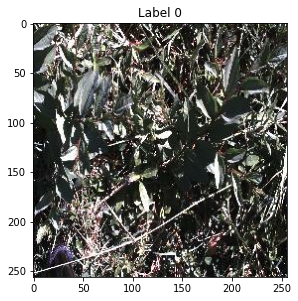

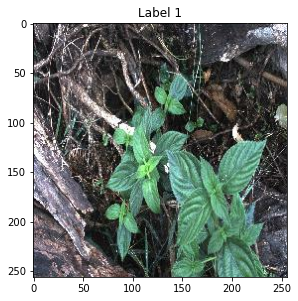

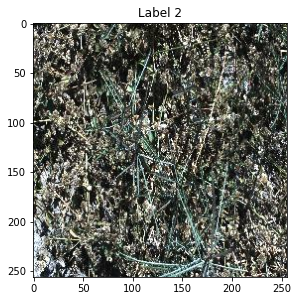

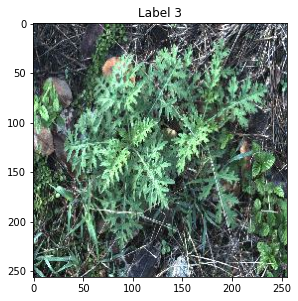

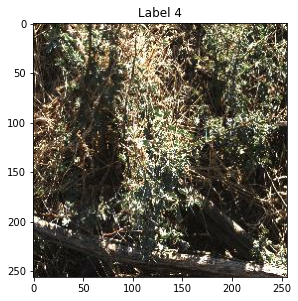

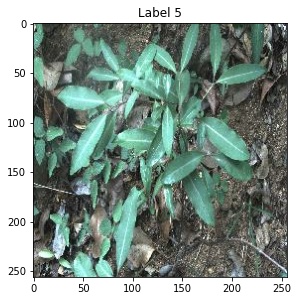

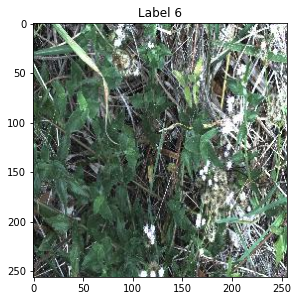

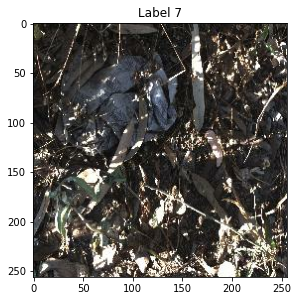

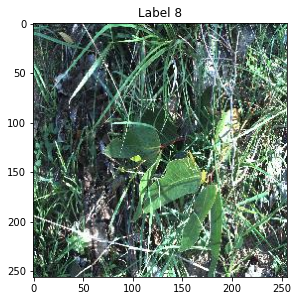

In [7]:
fig = plt.figure(figsize = (40,40))

for i in range(9):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,2,1)
    plt.imshow(img_sorted[i][np.random.randint(0,500)])
    ax.set_title(f"Label {i}")

In [8]:
def normalize_img(img):
    return img/255

In [9]:
def re_size(img, new_size):
    return cv2.resize(img, new_size)

# for i in range(len(img_sorted)):
#     fig = plt.figure(figsize = (10,10))
#     ax = fig.add_subplot(1,2,1)
#     n = np.random.randint(0,500)
#     plt.imshow(img_sorted[i][n])
#     ax.set_title(f"Label {i} Before")

#     ax = fig.add_subplot(1,2,2)
#     plt.imshow(re_size(img_sorted[i][n], (180,180)))
#     ax.set_title(f"Label {i} After")

In [10]:
def conv_greyscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# for i in range(len(img_sorted)):
#     fig = plt.figure(figsize = (10,10))
#     ax = fig.add_subplot(1,2,1)
#     n = np.random.randint(0,500)
#     plt.imshow(img_sorted[i][n])
#     ax.set_title(f"Label {i} Before ")



#     ax = fig.add_subplot(1,2,2)
#     plt.imshow(conv_greyscale(img_sorted[i][n]), cmap = 'gray')
#     ax.set_title(f"Label {i} After")

In [11]:
def histogram_equalization(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    return img_output

# for i in range(len(img_sorted)):
#     img = img_sorted[i][np.random.randint(0,500)]
    
#     fig = plt.figure(figsize = (10,10))
#     ax = fig.add_subplot(1,2,1)
#     plt.imshow(img)
#     ax.set_title("Before")

#     img_output = histogram_equalization(img)

#     ax = fig.add_subplot(1,2,2)
#     plt.imshow(img_output)
#     ax.set_title("After")

In [12]:
# def gaussian_filter(img, kernel_size):
#     return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

# def median_filter(img, kernel_size):
#     return cv2.medianBlur(img, kernel_size)

# def box_filter(img, kernel_size):
#     return cv2.blur(img , (kernel_size, kernel_size))


# for i in range(len(img_sorted)):
#     img = img_sorted[i][np.random.randint(0,500)]
#     fig = plt.figure(figsize = (20,20))
#     ax = fig.add_subplot(1,4,1)
#     plt.imshow(img)
#     ax.set_title(f"Label {i} Before")
    
#     gaussian = gaussian_filter(img, 5)
#     median = median_filter(img , 5)
#     box = box_filter(img , 5)
    
    
#     ax = fig.add_subplot(1,4,2)
#     plt.imshow(gaussian)
#     ax.set_title("Gaussian")
    
#     ax = fig.add_subplot(1,4,3)
#     plt.imshow(median)
#     ax.set_title("Median")
    
#     ax = fig.add_subplot(1,4,4)
#     plt.imshow(box)
#     ax.set_title("Box")

In [13]:
def sobel_filter(img, kernel_size):
    sobelx = cv2.Sobel(img, cv2.CV_64F,1,0, ksize = kernel_size)
    sobely = cv2.Sobel(img, cv2.CV_64F,0,1, ksize = kernel_size)
    sobel = np.sqrt(sobelx**2 + sobely**2)
    norm = np.linalg.norm(sobel)
    sobel = (sobel/norm) * 256
    return sobel

def laplacian_filter(img):
    return cv2.Laplacian(img, cv2.CV_64F)

# for i in range(len(img_sorted)):
#     img = img_sorted[i][np.random.randint(0,500)]
#     img = conv_greyscale(img)
#     fig = plt.figure(figsize = (25,25))
#     ax = fig.add_subplot(1,3,1)
#     plt.imshow(img, cmap = 'gray')
#     ax.set_title(f"Label {i} Before")
    
#     sobel = sobel_filter(img, 5)
#     laplacian = laplacian_filter(img)
    
#     ax = fig.add_subplot(1,3,2)
#     plt.imshow(sobel, cmap = 'gray')
#     ax.set_title("Sobel")
    
#     ax = fig.add_subplot(1,3,3)
#     plt.imshow(laplacian, cmap = 'gray')
#     ax.set_title("Laplacian")

PreProcessing 

1) Histogram Equalize each image

In [14]:
vfunc = np.vectorize(histogram_equalization)
for i in range(9):
  temp = img_sorted[i]
  s = temp.shape
  for j in range(s[0]):
    img_sorted[i][j] = histogram_equalization(img_sorted[i][j])

In [15]:
rgb_mean_sorted = []
for i in range(9):
  temp = []
  for j in img_sorted[i]:
    temp.append(np.mean(j))
  temp = np.array(temp)
  rgb_mean_sorted.append(temp)


In [16]:
average_intensity_sorted = []
for i in range(9):
  temp = []
  for j in img_sorted[i]:
    temp.append(np.mean(conv_greyscale(j)))
  temp = np.array(temp)
  average_intensity_sorted.append(temp)


In [17]:
histogram_sorted = []
for i in range(9):
  temp = []
  for j in img_sorted[i]:
    temp.append(cv2.calcHist([conv_greyscale(j)], [0], None, [256], [0, 256]).flatten())
  temp = np.array(temp)
  histogram_sorted.append(temp)

    
histogram_mean_diff = []
mean_hist = np.mean(np.array([np.mean(i, axis = 0) for i in histogram_sorted]), axis = 0)

for i in range(9):
    temp = []
    for j in histogram_sorted[i]:
        temp.append(np.sum(mean_hist - j))

    temp = np.array(temp)
    histogram_mean_diff.append(temp)

In [18]:
laplace_sorted = []
for i in range(9):
  temp = []
  for j in img_sorted[i]:
    temp.append(np.mean(laplacian_filter(j)))
  temp = np.array(temp)
  laplace_sorted.append(temp)

In [19]:
edge_sorted = []
for i in range(9):
  temp = []
  for j in img_sorted[i]:
    temp.append(np.mean(sobel_filter(j,3)))
  temp = np.array(temp)
  edge_sorted.append(temp)

In [27]:
from itertools import product
from scipy.signal import convolve
from tqdm import tqdm
# cv2.getGaborKernel(ksize, sigma, theta, lambda, gamma, psi, ktype)
# ksize - size of gabor filter (n, n)
# sigma - standard deviation of the gaussian function
# theta - orientation of the normal to the parallel stripes
# lambda - wavelength of the sunusoidal factor
# gamma - spatial aspect ratio
# psi - phase offset
# ktype - type and range of values that each pixel in the gabor kernel can hold

ksize = (5,5)
sigma = np.arange(1,4)
theta = (0, np.pi/4, np.pi/2, np.pi)
lambd = np.arange(1,4)

params = list(product(sigma, theta, lambd))

filterbank = [cv2.getGaborKernel(ksize, param[0], param[1], param[2], 0.5, 0, ktype=cv2.CV_32F) for param in params]

gabor_response_sorted = []

for i in range(9):
  print(f"Processing {i}th label")
  temp = np.ones((len(img_sorted[i]), len(filterbank)))
  for j in tqdm(range(len(img_sorted[i]))):
    response_m = [convolve(conv_greyscale(img_sorted[i][j]), k) for k in filterbank]
    for k in range(len(response_m)):
        temp[j][k] = np.mean(response_m[k])
  gabor_response_sorted.append(temp)

  0%|▏                                                                                | 2/1125 [00:00<01:48, 10.39it/s]

Processing 0th label


  0%|▏                                                                                | 2/1064 [00:00<01:36, 10.98it/s]

Processing 1th label


  0%|                                                                                         | 0/1031 [00:00<?, ?it/s]

Processing 2th label


  0%|▏                                                                                | 2/1022 [00:00<01:30, 11.30it/s]

Processing 3th label


  0%|▏                                                                                | 2/1062 [00:00<01:32, 11.44it/s]

Processing 4th label


  0%|▏                                                                                | 2/1009 [00:00<01:37, 10.35it/s]

Processing 5th label


  0%|▏                                                                                | 2/1074 [00:00<01:37, 11.02it/s]

Processing 6th label


  0%|                                                                                 | 1/1016 [00:00<01:45,  9.64it/s]

Processing 7th label


  0%|                                                                                 | 2/9106 [00:00<14:26, 10.51it/s]

Processing 8th label


100%|██████████████████████████████████████████████████████████████████████████████| 9106/9106 [14:28<00:00, 10.48it/s]


In [21]:
std_sorted = []
for i in range(9):
  temp = []
  for j in img_sorted[i]:
    temp.append(np.std(j))
  temp = np.array(temp)
  std_sorted.append(temp)

In [25]:
combined = []
for i in range(9):
  temp = list(zip([i for j in range(len(rgb_mean_sorted[i]))], rgb_mean_sorted[i], average_intensity_sorted[i], histogram_mean_diff[i], laplace_sorted[i], edge_sorted[i], gabor_response_sorted[i], std_sorted[i]))
  combined.extend(temp)

In [26]:
combined = np.array(combined)

<ipython-input-26-227acbe76ef4>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  combined = np.array(combined)


In [27]:
df = pd.DataFrame(combined, columns = ['label', 'rgb_mean', 'average_intensity', 'histogram', 'laplace_mean', 'edge_mean', 'gabor_response_array', 'std'])
df

,label,rgb_mean,average_intensity,histogram,laplace_mean,edge_mean,gabor_response_array,std
0,0,130.316,127.803,0.000335693,0.0493469,0.464015,"[1224.1965, 28.394781, 127.23065, 90.49527, 34...",74.3744
1,0,126.545,128.527,0.000793457,-0.0122579,0.469058,"[1231.1304, 28.555613, 127.95129, 91.00785, 34...",73.0402
2,0,129.408,128.898,0,-0.0099233,0.419324,"[1234.6803, 28.63795, 128.32024, 91.27024, 35....",73.9774
3,0,126.833,128.109,0.000244141,0.0508779,0.447502,"[1227.1248, 28.462696, 127.53496, 90.71172, 34...",74.4864
4,0,123.833,128.494,6.10352e-05,0.0209859,0.418377,"[1230.8158, 28.548311, 127.91858, 90.984566, 3...",71.5143
...,...,...,...,...,...,...,...,...
17504,8,127.676,128.719,0.000244141,-0.0438894,0.473582,"[1232.9634, 28.59813, 128.14178, 91.143326, 35...",73.6668
17505,8,126.64,128.309,0,0.0602214,0.4766,"[1229.0425, 28.507177, 127.734276, 90.853485, ...",73.2365
17506,8,127.825,128.76,0.000244141,-0.0360413,0.460144,"[1233.3644, 28.607422, 128.18344, 91.17297, 35...",74.1635
17507,8,127.602,128.354,0.000366211,0.0266622,0.467747,"[1229.4697, 28.517094, 127.77869, 90.88507, 34...",73.5391


In [28]:
df.to_pickle("./Weed_Features.pkl")

In [2]:
temp = pd.read_pickle("./Weed_Features.pkl")

In [5]:
temp.describe()

In [ ]:
temp[]